# Data exploration

- A disclaimer. I know woefully little about sql at the moment, so much of this might just be playing around with queries. It will evolve with the repo

In [1]:
#imports and settings
import sqlite3
import pandas as pd
import pretty_midi
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
pd.options.display.max_columns = 999
plt.style.use('bmh')

In [2]:
conn = sqlite3.connect('/Users/tburch/Documents/Datasets/jazz/wjazzd.db')

## Let's just kinda browse some tables.
### Starting with "beats"

In [3]:
# Beats table
query = "SELECT * FROM beats"
df_beats = pd.read_sql_query(query, conn)
df_beats.head()


,beatid,melid,onset,bar,beat,signature,chord,form,bass_pitch,chorus_id
0,1,1,9.171882,-1,1,,,I1,42.0,0
1,2,1,9.488254,-1,2,,,,42.0,0
2,3,1,9.779955,-1,3,,,,40.0,0
3,4,1,10.052608,-1,4,,,,40.0,0
4,5,1,10.339796,0,1,,Bb6,,50.0,0


okay, so this will be useful for getting the chord names and roots of songs. Also hints the general structure of the data (bar = measure, beat is self explanitory). Probably more in melody

### Looking at melody table

In [18]:
# Melody
query = "SELECT * FROM melody"
df_melody = pd.read_sql_query(query, conn)
df_melody.head(10000)

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,subtatum,num,denom,beatprops,beatdur,tatumprops,f0_mod,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev
0,1,1,10.343492,65.0,0.138776,4,1,0,1,1,0,4,4,None,0.291746,"(1,)",,0.126209,66.526087,5.541147,0.307692,0.389466,1.056169,37.794261,12.932532,-0.328442
1,2,1,10.637642,63.0,0.171247,4,4,0,2,1,0,4,4,None,0.286621,"(1.0, 1.0, 1.0, 1.173)",,0.349751,69.133321,2.912412,0.250000,0.468687,1.120317,6.365930,6.956935,11.135423
2,3,1,10.843719,58.0,0.081270,4,4,0,2,4,0,4,4,None,0.286621,"(1.0, 1.0, 1.0, 1.173)",,0.094051,66.352130,3.564563,0.428571,0.531354,1.310389,68.010392,NaN,32.366787
3,4,1,10.948209,61.0,0.235102,4,1,0,3,1,0,4,4,None,0.298844,"(1,)",,0.521187,66.484173,2.414298,0.818182,0.559333,0.984047,15.443906,5.867151,-3.374696
4,5,1,11.232653,63.0,0.130612,4,1,0,4,1,0,4,4,None,0.297120,"(1,)",,0.560737,71.699054,2.185794,0.166667,0.438973,1.061262,11.444363,8.329975,6.377737
5,6,1,11.551927,58.0,0.188662,4,1,1,1,1,0,4,4,None,0.310023,"(1,)",,0.534657,67.636708,7.635221,0.411765,0.359536,1.049956,39.368720,6.589582,16.146429
6,7,1,11.859592,58.0,0.481814,4,1,1,2,1,0,4,4,None,0.305283,"(1,)",vibrato,0.584914,63.659343,5.518070,0.068182,0.403372,0.983151,39.429103,5.406750,11.239471
7,8,1,14.535692,50.0,0.159637,4,1,3,3,1,0,4,4,None,0.269977,"(1,)",,-0.129185,58.507975,5.020340,0.133333,0.368384,0.927912,174.398513,NaN,25.203232
8,9,1,14.799819,57.0,0.145125,4,2,3,4,1,0,4,4,None,0.303084,"(1.0, 0.438)",,0.599931,71.173670,2.938194,0.285714,0.551884,1.064195,27.066543,7.758283,25.736430
9,10,1,14.973968,60.0,0.110295,4,2,3,4,2,0,4,4,None,0.303084,"(1.0, 0.438)",,0.484532,69.632891,2.325457,0.600000,0.508617,1.038483,17.141304,11.184763,15.693739


Okay, lots to unpack here. https://jazzomat.hfm-weimar.de/dbformat/dbformat.html tells everything but still some I'm unfamiliar with.

After thinking some, tatum is basically "minimum number of subdivisions" and tatumprops is how those breakdown. E.g. bar 0, beat 2 has 4 tatums - so one beat divided into 4. The tatumprop here is (1.0, 1.0, 1.0, 1.173), so those 4 break down into 3 that are the same length and one that's longer. Note 1 happens on tatum 1, note 2 happens on tatum 4. So that means note 1 corresponds to (3 \* 1.0) = 3 while note 2 corresponds to (1 \* 1.173) = 1.173. So the first note is ~3 times longer than the second, and these fit into a beat. So that's basically a dotted eighth to a sixteenth rhythm. This can be confirmed by looking at the sheet music of [Anthropology](https://jazzomat.hfm-weimar.de/dbformat/synopsis/scores/ArtPepper_Anthropology_FINAL.pdf). The extra length must be due to swung eighths? Not entirely sure, to be researched. If that's correct, this is going to be a pain to make into something useful.

Apparently pitch is in "fractional midi," which I'm unfamiliar with.
Luckily, pretty_midi has some converters... Let's see how those work.

In [5]:
df_melody.pitch.head().apply(pretty_midi.note_number_to_name)

0     F4
1    D#4
2    A#3
3    C#4
4    D#4
Name: pitch, dtype: object

Okay, so that makes sense. Fractional midi must be numerical distance in half steps between notes (e.g. pitch 1 = F4 = 65 midi. pitch 2 = D\#4 = 63 midi. This is 2 half steps, 65-63 = 2). That form is actually much more convienient than dealing with either pitch names or frequencies.

### Well... what songs are these actually?

In [6]:
# Songs
query = "SELECT * FROM composition_info"
df_songs = pd.read_sql_query(query, conn)
df_songs.head()


,compid,title,composer,form,template,tonalitytype,genre
0,1,Anthropology,"Parker, Gillespie",A8A8B8A8,I Got Rhythm,FUNCTIONAL,ORIGINAL
1,2,Blues for Blanche,Art Pepper,A12,Blues,BLUES,ORIGINAL
2,3,Desafinado,Antonio Carlos Jobim,A1612B8C8,,FUNCTIONAL,ORIGINAL
3,4,In a Mellow Tone,Duke Ellington,A16B16,,FUNCTIONAL,GREAT AMERICAN SONGBOOK
4,5,Stardust,"Parish, Carmichael",A16B16,,FUNCTIONAL,GREAT AMERICAN SONGBOOK


Cool. It'd be interesting to see what forms and composers creep up a lot

In [7]:
print len(df_songs.form.value_counts())," unique forms"
df_songs.form.value_counts().head(15)

70  unique forms


A8A8B8A8        70
A12             60
A16B16          28
open            17
A16             13
A8B8            10
A16A16B16A16     6
A8B8A8C8         5
A8A8B8C8         5
A8A8B8C12        5
A8A8B8           4
A16A16           4
A24              4
A8B8C8D8         3
A16B8A8          3
Name: form, dtype: int64

In [8]:
print len(df_songs.composer.value_counts())," unique composers"
df_songs.composer.value_counts().head(15)


195  unique composers


                   8
Parker             8
John Coltrane      8
Dexter Gordon      6
Sonny Rollins      6
Cole Porter        5
Bob Berg           5
Coleman            5
Thelonious Monk    5
Clifford Brown     4
Dave Holland       4
Wayne Shorter      4
Woody Shaw         4
Duke Ellington     4
Michael Brecker    4
Name: composer, dtype: int64

Okay, well not so much diversity in forms, but I guess that's true for jazz - lots of AABA or 12 bar blues, which are the two largest by far. Lots of diversity in composers though, so that's definitely cool. 

## Some quick and dirty things

In [9]:
df_melody.pitch.describe()

count    200809.000000
mean         65.639513
std           7.275213
min          36.000000
25%          61.000000
50%          66.000000
75%          70.000000
max          97.000000
Name: pitch, dtype: float64

In [10]:
from math import ceil
pretty_midi.note_number_to_name(ceil(df_melody.pitch.mean()))

'F#4'

So the mean pitch is an F\#4, right around the middle of the keyboard. Bottom of the treble clef, this sounds about right. There's not really a distinction of instruments or major or minor keys so this a pretty sweeping generalization but still useful

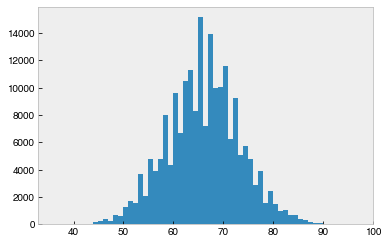

In [11]:
pitch_range = df_melody.pitch.max()-df_melody.pitch.min()
ax= df_melody.pitch.hist(bins=int(pitch_range))
ax.grid(False)

Normal distribution here makes sense - few very high or very low notes. This is binned by pitch so the large variations should be investigated. My suspicion is that the peak is the root of the most common key (likely F based on it being ~mean) and then it would make sense that you seldom have a m2 above or below that due to the dissonance. The next peak is a 4 above that, then a 5, which makes sense from a harmonic standpoint. b3 and 3 are both about the same, which since there's not a distincion on major or minor keys, this also makese sense.

### Let's see if we can find the key...

In [16]:
# Beats table
query = "SELECT * FROM solo_info"
solo_info = pd.read_sql_query(query, conn)
solo_info.head(10)

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count
0,1,1,1,1,Art Pepper,Anthropology,,1,cl,COOL,218.8,UP,SWING,Bb-maj,4/4,A1: ||Bb6 G7 |C-7 F7 |Bb G-7 |C-7 F7 |F-7 Bb7 ...,4
1,2,2,2,2,Art Pepper,Blues for Blanche,,1,as,COOL,198.9,UP,SWING,Eb-maj,4/4,A1: ||Eb7 |Ab7 |Eb7 |Eb7 |Ab7 |Ab7 ...,11
2,3,3,3,1,Art Pepper,Desafinado,,1,as,COOL,140.5,MEDIUM UP,LATIN,F-maj,4/4,A1: ||Fj7 |Fj7 |G7alt |G7alt |G-7 |C...,2
3,4,4,4,1,Art Pepper,In a Mellow Tone,,1,cl,COOL,167.6,MEDIUM UP,SWING,Eb-maj,4/4,A1: ||F7 |Bb7 |Eb6 |Eb6 |Bb-7 |Eb7 ...,4
4,5,5,5,2,Art Pepper,Stardust,,1,as,COOL,60.7,SLOW,BALLAD,Eb-maj,4/4,A1: ||Ab6 |Ab6 |Ab-6 |Ab-6 Db7 |Eb F-7 |...,2
5,6,5,5,2,Art Pepper,Stardust,,2,as,COOL,60.2,SLOW,BALLAD,Eb-maj,4/4,B1: ||Ab6 |Ab6 |Ab-6 |Db7 |Ebj7 |G-7...,1
6,7,6,6,3,Benny Carter,I Got It Bad,,1,as,SWING,68.2,SLOW,SWING,Db-maj,4/4,A1: ||Dbj7 |F-7 Bb7 |Eb7 |Eb7 |Eb-7 |F...,1
7,8,7,7,4,Benny Carter,It's a Wonderful World,,1,as,SWING,124.2,MEDIUM,SWING,C-maj,4/4,A1: ||Cj7 |E-7 A7 |D-7 G7 |Cj7 ||\nA2: ||C...,3
8,9,7,7,4,Benny Carter,It's a Wonderful World,,2,as,SWING,127.2,MEDIUM,SWING,C-maj,4/4,A1: ||Cj7 |E-7 A7 |D- G7 |Cj7 G7 ||\nA2: ||C...,2
9,10,8,8,4,Benny Carter,Just Friends,,1,as,SWING,204.9,UP,SWING,Bb-maj,4/4,A1: ||Bbj7 |Bbj7 |Bb-7 |Eb7 |Fj7 |Fj...,3
